In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("student-por.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
data["school"].unique()

data = data.drop(columns={"age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","schoolsup","famsup","paid",'nursery', 'higher', 'internet', 'romantic',"activities",'sex', 'reason', 'guardian'},axis=0)

In [4]:
data.columns

Index(['school', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
data

,school,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,2,2,0,4,3,4,1,1,3,4,0,11,11
1,GP,1,2,0,5,3,3,1,1,3,2,9,11,11
2,GP,1,2,0,4,3,2,2,3,3,6,12,13,12
3,GP,1,3,0,3,2,2,1,1,5,0,14,14,14
4,GP,1,2,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,1,3,1,5,4,2,1,2,5,4,10,11,10
645,MS,1,2,0,4,3,4,1,1,1,4,15,15,16
646,MS,2,2,0,1,1,1,1,1,5,6,11,12,9
647,MS,2,1,0,2,4,5,3,4,2,6,10,10,10


In [6]:
from sklearn.model_selection import train_test_split
data.shape

(649, 14)

In [7]:
x=data.iloc[:,2:].values


In [8]:
y = data.iloc[:,0].values


In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.2)

In [10]:
xtrain.shape

(519, 12)

In [11]:
xtest.shape

(130, 12)

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,cohen_kappa_score,precision_score


In [13]:
glt = GaussianNB()
glt.fit(xtrain,ytrain)
predict_value = glt.predict(xtest)
print("Confusion Matrix \n",confusion_matrix(ytest,predict_value))
print("Accuracy Score \n",accuracy_score(ytest,predict_value))
print("Cohen Kappa Score \n",cohen_kappa_score(ytest,predict_value))
print("Classification Report \n",classification_report(ytest,predict_value))

Confusion Matrix 
 [[77  9]
 [23 21]]
Accuracy Score 
 0.7538461538461538
Cohen Kappa Score 
 0.40401146131805155
Classification Report 
               precision    recall  f1-score   support

          GP       0.77      0.90      0.83        86
          MS       0.70      0.48      0.57        44

    accuracy                           0.75       130
   macro avg       0.73      0.69      0.70       130
weighted avg       0.75      0.75      0.74       130



In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
arr = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    predict_value = knn.predict(xtest)
    arr.append(accuracy_score(ytest,predict_value))
    print("Accuracy Score : ",i," = ",accuracy_score(ytest,predict_value))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy Score :  1  =  0.5384615384615384
Accuracy Score :  2  =  0.6461538461538462
Accuracy Score :  3  =  0.6615384615384615
Accuracy Score :  4  =  0.6615384615384615
Accuracy Score :  5  =  0.6615384615384615
Accuracy Score :  6  =  0.6923076923076923
Accuracy Score :  7  =  0.676923076923077
Accuracy Score :  8  =  0.7076923076923077
Accuracy Score :  9  =  0.7307692307692307
Accuracy Score :  10  =  0.7153846153846154
Accuracy Score :  11  =  0.7307692307692307
Accuracy Score :  12  =  0.7230769230769231
Accuracy Score :  13  =  0.7384615384615385
Accuracy Score :  14  =  0.7230769230769231
Accuracy Score :  15  =  0.7538461538461538
Accuracy Score :  16  =  0.7461538461538462
Accuracy Score :  17  =  0.7692307692307693
Accuracy Score :  18  =  0.7461538461538462
Accuracy Score :  19  =  0.7461538461538462
Accuracy Score :  20  =  0.7461538461538462


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy Score :  21  =  0.7384615384615385
Accuracy Score :  22  =  0.7307692307692307
Accuracy Score :  23  =  0.7384615384615385
Accuracy Score :  24  =  0.7384615384615385
Accuracy Score :  25  =  0.7615384615384615
Accuracy Score :  26  =  0.7538461538461538
Accuracy Score :  27  =  0.7615384615384615
Accuracy Score :  28  =  0.7615384615384615
Accuracy Score :  29  =  0.7692307692307693
Accuracy Score :  30  =  0.7384615384615385
Accuracy Score :  31  =  0.7384615384615385
Accuracy Score :  32  =  0.7461538461538462
Accuracy Score :  33  =  0.7538461538461538
Accuracy Score :  34  =  0.7461538461538462
Accuracy Score :  35  =  0.7384615384615385
Accuracy Score :  36  =  0.7461538461538462
Accuracy Score :  37  =  0.7538461538461538
Accuracy Score :  38  =  0.7461538461538462
Accuracy Score :  39  =  0.7538461538461538
Accuracy Score :  40  =  0.7538461538461538
Accuracy Score :  41  =  0.7538461538461538
Accuracy Score :  42  =  0.7384615384615385
Accuracy Score :  43  =  0.74615

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [16]:
from matplotlib import pyplot as plt


Text(0, 0.5, 'Accuracy Score')

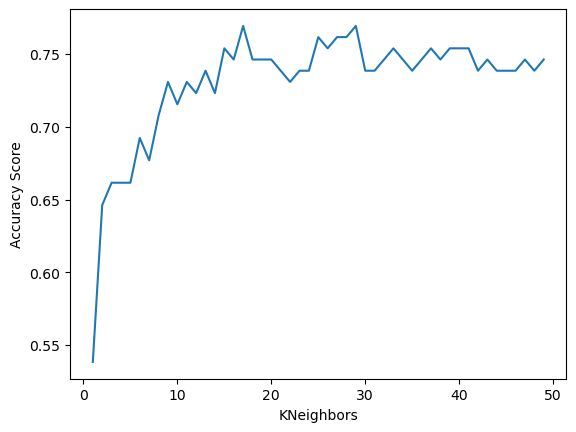

In [17]:
plt.plot(range(1,50),arr)
plt.xlabel("KNeighbors")
plt.ylabel("Accuracy Score")

In [18]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(xtrain,ytrain)
predict_value = knn.predict(xtest)
print("Confusion Matrix \n",confusion_matrix(ytest,predict_value))
print("Accuracy Score \n",accuracy_score(ytest,predict_value))
print("Cohen Kappa Score \n",cohen_kappa_score(ytest,predict_value))
print("Classification Report \n",classification_report(ytest,predict_value))

Confusion Matrix 
 [[83  3]
 [30 14]]
Accuracy Score 
 0.7461538461538462
Cohen Kappa Score 
 0.33322971712775873
Classification Report 
               precision    recall  f1-score   support

          GP       0.73      0.97      0.83        86
          MS       0.82      0.32      0.46        44

    accuracy                           0.75       130
   macro avg       0.78      0.64      0.65       130
weighted avg       0.76      0.75      0.71       130



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [19]:
from sklearn.svm import SVC

In [20]:
# help(SVC)
svc = SVC(kernel="rbf")
svc.fit(xtrain,ytrain)
predict_value = svc.predict(xtest)
print("Confusion Matrix \n",confusion_matrix(ytest,predict_value))
print("Accuracy Score \n",accuracy_score(ytest,predict_value))
print("Cohen Kappa Score \n",cohen_kappa_score(ytest,predict_value))
print("Classification Report \n",classification_report(ytest,predict_value))

Confusion Matrix 
 [[83  3]
 [32 12]]
Accuracy Score 
 0.7307692307692307
Cohen Kappa Score 
 0.2834645669291338
Classification Report 
               precision    recall  f1-score   support

          GP       0.72      0.97      0.83        86
          MS       0.80      0.27      0.41        44

    accuracy                           0.73       130
   macro avg       0.76      0.62      0.62       130
weighted avg       0.75      0.73      0.68       130



In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
# help(DecisionTreeClassifier)
arr=[]
for i in range(1,50):
    Tree = DecisionTreeClassifier(criterion="gini",max_depth=i)
    Tree.fit(xtrain,ytrain)
    predict_value = Tree.predict(xtest)
    arr.append(accuracy_score(ytest,predict_value))
    print("DecisionTreeClassifier ",i," = ",accuracy_score(ytest,predict_value))


DecisionTreeClassifier  1  =  0.6846153846153846
DecisionTreeClassifier  2  =  0.6846153846153846
DecisionTreeClassifier  3  =  0.7153846153846154
DecisionTreeClassifier  4  =  0.6461538461538462
DecisionTreeClassifier  5  =  0.7307692307692307
DecisionTreeClassifier  6  =  0.6384615384615384
DecisionTreeClassifier  7  =  0.676923076923077
DecisionTreeClassifier  8  =  0.6923076923076923
DecisionTreeClassifier  9  =  0.6461538461538462
DecisionTreeClassifier  10  =  0.6461538461538462
DecisionTreeClassifier  11  =  0.6384615384615384
DecisionTreeClassifier  12  =  0.6
DecisionTreeClassifier  13  =  0.5846153846153846
DecisionTreeClassifier  14  =  0.6384615384615384
DecisionTreeClassifier  15  =  0.5923076923076923
DecisionTreeClassifier  16  =  0.6
DecisionTreeClassifier  17  =  0.5923076923076923
DecisionTreeClassifier  18  =  0.6153846153846154
DecisionTreeClassifier  19  =  0.5923076923076923
DecisionTreeClassifier  20  =  0.5846153846153846
DecisionTreeClassifier  21  =  0.6230769

Text(0, 0.5, 'Accuracy Score')

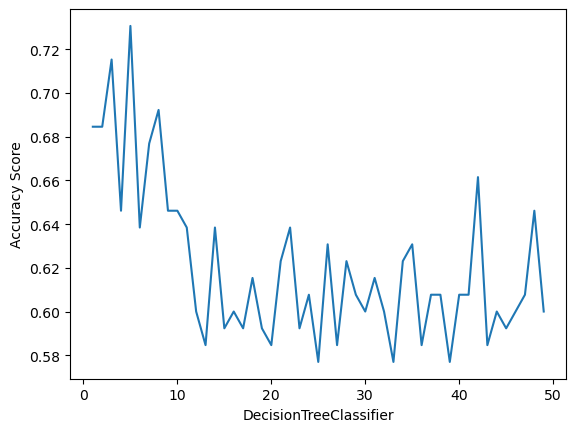

In [23]:
plt.plot(range(1,50),arr)
plt.xlabel("DecisionTreeClassifier")
plt.ylabel("Accuracy Score")

In [24]:
Tree = DecisionTreeClassifier(criterion="gini",max_depth=5)
Tree.fit(xtrain,ytrain)
predict_value = Tree.predict(xtest)
print("Confusion Matrix \n",confusion_matrix(ytest,predict_value))
print("Accuracy Score \n",accuracy_score(ytest,predict_value))
print("Cohen Kappa Score \n",cohen_kappa_score(ytest,predict_value))
print("Classification Report \n",classification_report(ytest,predict_value))
    

Confusion Matrix 
 [[72 14]
 [20 24]]
Accuracy Score 
 0.7384615384615385
Cohen Kappa Score 
 0.39584472389283765
Classification Report 
               precision    recall  f1-score   support

          GP       0.78      0.84      0.81        86
          MS       0.63      0.55      0.59        44

    accuracy                           0.74       130
   macro avg       0.71      0.69      0.70       130
weighted avg       0.73      0.74      0.73       130



In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
Random = RandomForestClassifier()
Random.fit(xtrain,ytrain)
predict_value = Random.predict(xtest)
print("Confusion Matrix \n",confusion_matrix(ytest,predict_value))
print("Accuracy Score \n",accuracy_score(ytest,predict_value))
print("Cohen Kappa Score \n",cohen_kappa_score(ytest,predict_value))
print("Classification Report \n",classification_report(ytest,predict_value))
    

Confusion Matrix 
 [[80  6]
 [26 18]]
Accuracy Score 
 0.7538461538461538
Cohen Kappa Score 
 0.38168846611177176
Classification Report 
               precision    recall  f1-score   support

          GP       0.75      0.93      0.83        86
          MS       0.75      0.41      0.53        44

    accuracy                           0.75       130
   macro avg       0.75      0.67      0.68       130
weighted avg       0.75      0.75      0.73       130



In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logisticeregression = LogisticRegression()
logisticeregression.fit(xtrain,ytrain)
predict_value = logisticeregression.predict(xtest)
print("Confusion Matrix \n",confusion_matrix(ytest,predict_value))
print("Accuracy Score \n",accuracy_score(ytest,predict_value))
print("Cohen Kappa Score \n",cohen_kappa_score(ytest,predict_value))
print("Classification Report \n",classification_report(ytest,predict_value))
    

Confusion Matrix 
 [[78  8]
 [28 16]]
Accuracy Score 
 0.7230769230769231
Cohen Kappa Score 
 0.30439952437574314
Classification Report 
               precision    recall  f1-score   support

          GP       0.74      0.91      0.81        86
          MS       0.67      0.36      0.47        44

    accuracy                           0.72       130
   macro avg       0.70      0.64      0.64       130
weighted avg       0.71      0.72      0.70       130



In [29]:
data

,school,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,2,2,0,4,3,4,1,1,3,4,0,11,11
1,GP,1,2,0,5,3,3,1,1,3,2,9,11,11
2,GP,1,2,0,4,3,2,2,3,3,6,12,13,12
3,GP,1,3,0,3,2,2,1,1,5,0,14,14,14
4,GP,1,2,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,1,3,1,5,4,2,1,2,5,4,10,11,10
645,MS,1,2,0,4,3,4,1,1,1,4,15,15,16
646,MS,2,2,0,1,1,1,1,1,5,6,11,12,9
647,MS,2,1,0,2,4,5,3,4,2,6,10,10,10


In [30]:
pd.crosstab(data["school"],data["traveltime"])

traveltime,1,2,3,4
school,,,,
GP,283,109,20,11
MS,83,104,34,5


<AxesSubplot:xlabel='school'>

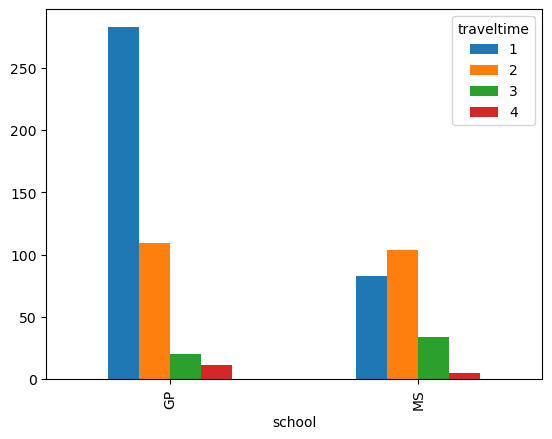

In [32]:
Plot = pd.crosstab(data["school"],data["traveltime"])
Plot.plot(kind="bar")

<AxesSubplot:xlabel='school'>

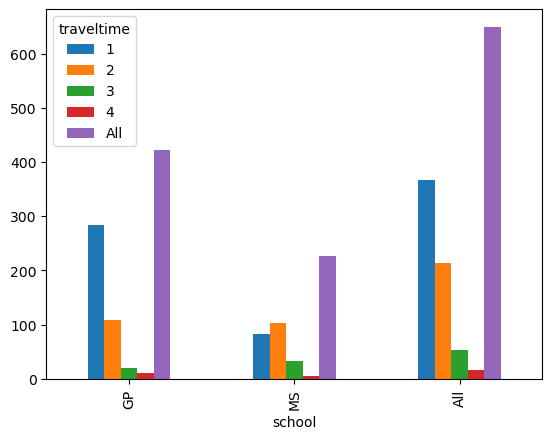

In [33]:
Plot = pd.crosstab(data["school"],data["traveltime"],margins=True)
Plot.plot(kind="bar")

<AxesSubplot:xlabel='school'>

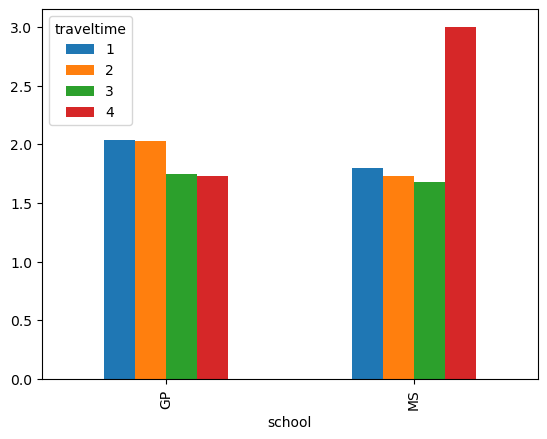

In [38]:
Plot = pd.crosstab(data["school"],data["traveltime"],values=data["studytime"],aggfunc=np.mean)
Plot.plot(kind="bar")

In [39]:
pd.crosstab(data["school"],data["traveltime"],values=data["studytime"],aggfunc=np.mean)


traveltime,1,2,3,4
school,,,,
GP,2.038869,2.027523,1.750000,1.727273
MS,1.795181,1.730769,1.676471,3.000000


In [42]:
pd.crosstab(data["school"],[data["traveltime"],data["studytime"]])

traveltime   1                2              3            4         
studytime    1    2   3   4   1   2   3  4   1   2  3  4  1  2  3  4
school                                                              
GP          72  145  49  17  34  47  19  9   8   9  3  0  5  5  0  1
MS          33   36  12   2  45  45  11  3  15  17  0  2  0  1  3  1

<AxesSubplot:xlabel='school'>

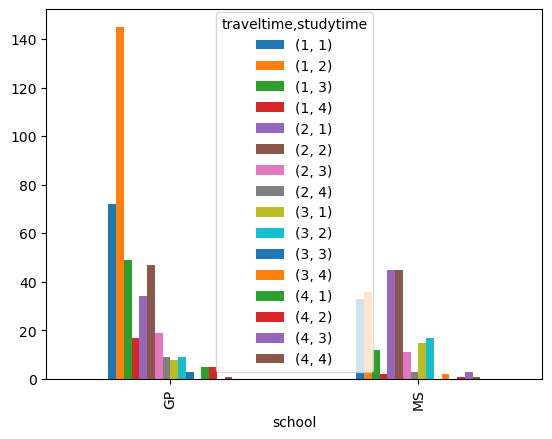

In [44]:
Plot = pd.crosstab(data["school"],[data["traveltime"],data["studytime"]])
Plot.plot(kind="bar")